# SPEECH EMOTION RECOGNITION USING PYTHON








In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X, sample_rate = librosa.load(file_name)
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [3]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'disgust', 'fearful']

In [4]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    actor = []
    for file in glob.glob("C:\\Users\\suraj\\my_python_files\\dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
#Split the dataset

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [6]:
#Get the shape of the training and testing datasets

print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [7]:
# Get the number of features extracted

print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [9]:
#Initialize the Multi Layer Perceptron Classifier

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=700)

In [10]:
#Train the model

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=700)

In [11]:
#Predict for the test set

y_pred=model.predict(x_test)

In [12]:
#Calculate the accuracy of our model

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.10%


In [13]:
#classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        calm       0.90      0.46      0.60        57
     disgust       0.54      0.81      0.65        48
     fearful       0.69      0.68      0.68        37
       happy       0.64      0.70      0.67        50

    accuracy                           0.65       192
   macro avg       0.69      0.66      0.65       192
weighted avg       0.70      0.65      0.65       192



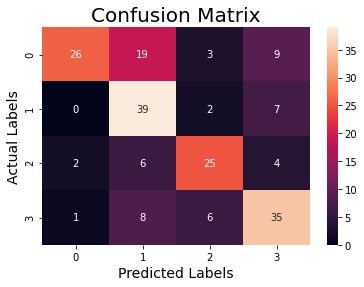

In [14]:
#confusion_matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt = '')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

# THANK YOU